In [1]:
import pandas as pd
import matplotlib.pyplot as plt
datos=pd.read_csv("./Sick_pacientes.txt",sep=";")
datos.head(20)

,caso,edad,genero,depresion,embarazada,cirugía_de_tiroides,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,clase
0,1,56,F,NO,NO,NO,1.900,2.044,129.00,1.0500,123.00,0
1,2,51,F,NO,NO,NO,0.250,1.900,101.00,1.0800,94.00,0
2,3,50,F,NO,NO,NO,2.000,2.500,133.00,1.0800,123.00,0
3,4,73,M,NO,NO,NO,1.800,2.100,103.00,0.9200,112.00,0
4,5,56,F,NO,NO,NO,3.774,3.900,141.00,1.1200,126.00,0
5,6,44,M,NO,NO,NO,1.900,2.200,103.00,1.2000,86.00,0
6,7,24,F,NO,NO,NO,1.700,2.400,126.00,0.9200,136.00,0
7,8,40,M,NO,NO,NO,0.250,2.300,134.00,0.8400,160.00,0
8,9,81,M,NO,NO,NO,1.300,1.200,147.00,1.0600,138.00,0
9,10,53,F,NO,NO,NO,0.850,2.000,103.00,0.9300,111.00,0


In [2]:
datos=datos[datos.edad<100]

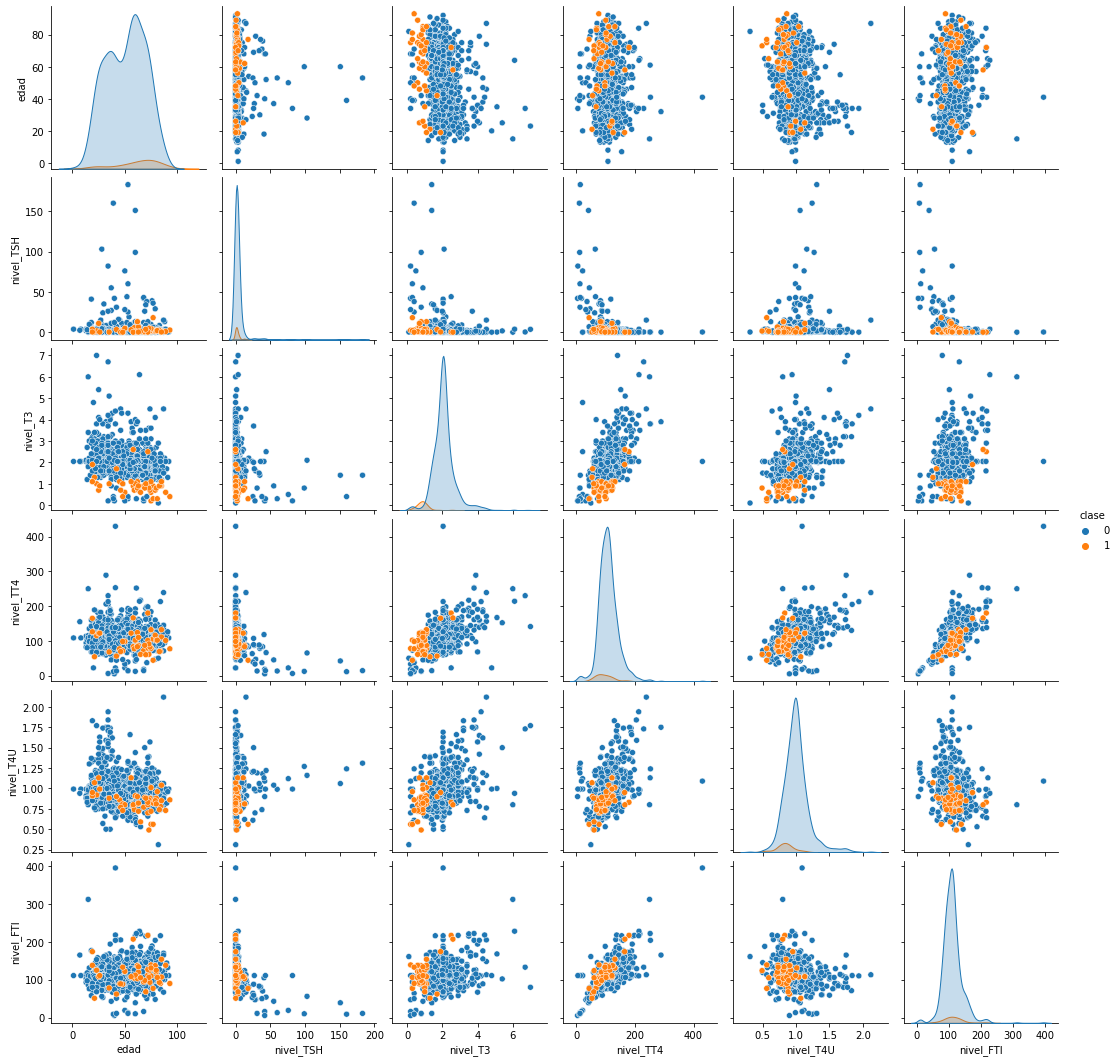

In [3]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
sns.pairplot(datos.drop(columns=['caso']),hue="clase")
plt.show()

In [7]:
datos.drop(columns=['caso']).corr()

,edad,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,clase
edad,1.000000,-0.014923,-0.234410,-0.040778,-0.179125,0.074656,0.129440
nivel_TSH,-0.014923,1.000000,-0.192455,-0.314900,0.097382,-0.349944,-0.020584
nivel_T3,-0.234410,-0.192455,1.000000,0.485025,0.429450,0.262930,-0.358271
nivel_TT4,-0.040778,-0.314900,0.485025,1.000000,0.443585,0.747004,-0.087859
nivel_T4U,-0.179125,0.097382,0.429450,0.443585,1.000000,-0.192242,-0.192690
nivel_FTI,0.074656,-0.349944,0.262930,0.747004,-0.192242,1.000000,0.027433
clase,0.129440,-0.020584,-0.358271,-0.087859,-0.192690,0.027433,1.000000


1	Separe la variable edad en una variable Y.

2	Separe un conjunto de datos denominado X que no contenga la variable edad.

In [8]:
Y=datos['edad']
X=datos.drop(columns=['edad','clase'])

3	 Transforme las variables categóricas de X a dummies.

In [9]:
X_dummies=pd.get_dummies(X,drop_first=True)

4	 Separe las poblaciones en entrenamiento y validación en forma aleatoria en 70/30 (genere una semilla aleatoria e indique el valor de la semilla que utilizó). Indique que cantidad de casos quedaron para cada ambiente).

In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummies, 
                                                    Y, 
                                                    test_size = 0.3, 
                                                    random_state = 0)
# Show the results of the split
print("Total ejemplos train {}.".format(X_train.shape[0]))
print("Total ejemplos test {}.".format(X_test.shape[0]))

Total ejemplos train 667.
Total ejemplos test 287.


5	 Ajuste un árbol de decisión de diferentes profundidades (max_depth) usando el conjunto de entrenamiento 70%.

In [11]:
from sklearn import tree
params={'ccp_alpha': 1, 'criterion': 'mse', 'max_depth': 4, 'min_impurity_decrease': 0.0025, 'min_samples_leaf': 3,
                    'min_samples_split': 2, 'splitter': 'random'}
# Crear Arbol de decision con profundidad = 4
modelo1 = tree.DecisionTreeRegressor(**params)
modelo1.fit(X_train, y_train)
print("profundidad:",modelo1.get_depth())
print("hojas:",modelo1.get_n_leaves())

profundidad: 4
hojas: 6


In [12]:
# Crear Arbol de decision con profundidad = 10
modelo2 = tree.DecisionTreeRegressor(criterion='mse')
modelo2.fit(X_train, y_train)
print("profundidad:",modelo2.get_depth())
print("hojas:",modelo2.get_n_leaves())

profundidad: 24
hojas: 631


In [13]:
# Crear Arbol de decision con profundidad = 4
modelo3 = tree.DecisionTreeRegressor(criterion='mse',
                                             ccp_alpha=5
                                           )
modelo3.fit(X_train, y_train)
print("profundidad:",modelo3.get_depth())
print("hojas:",modelo3.get_n_leaves())

profundidad: 3
hojas: 4


6	 Grafique los árboles 

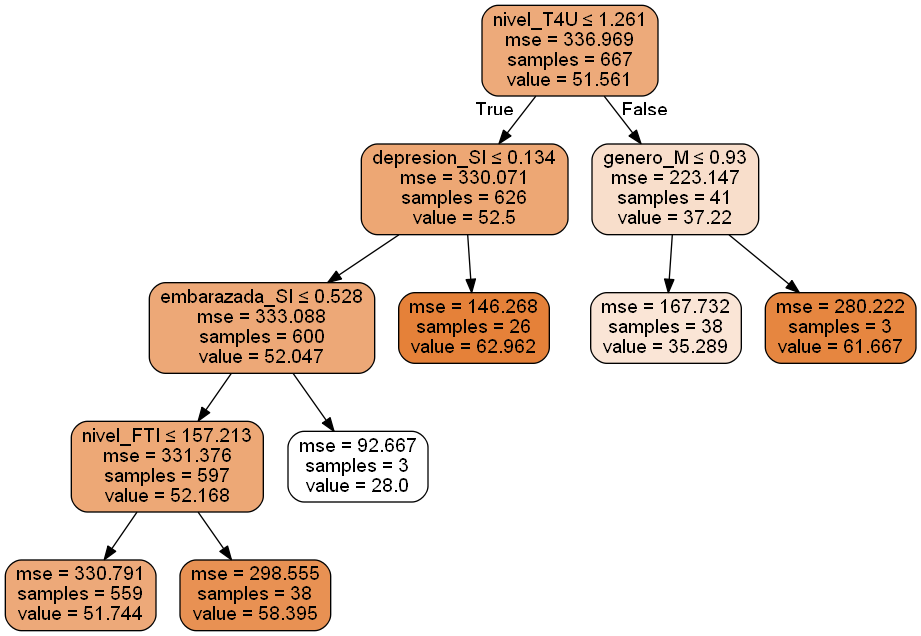

In [14]:
import os
from six import StringIO 

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

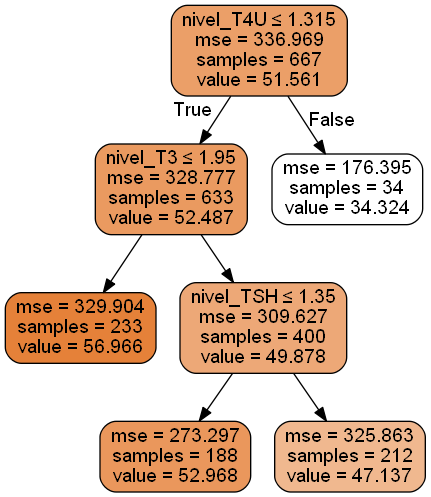

In [15]:
import os
from six import StringIO 

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

dot_data = StringIO()

feature_cols=X_train.columns
export_graphviz(modelo3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No Enfermo','Enfermo'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('arbol.png')
Image(graph.create_png())

In [16]:
from sklearn.linear_model import LinearRegression

modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train, y_train)

LinearRegression()

7	Calcular la RSME, R2 y R2 ajustado en los ambientes de entrenamiento y validación de cada modelo

Evaluación de la precisión del modelo

La calidad del ajuste de la regresión lineal típicamente es evaluada usando dos medidas: el RMSE (Raíz error cuadrático medio ) y el estadístico R cuadrado.

In [17]:
from  sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def eval_model(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    rmse_test=mean_squared_error(y_test,predictions_test,squared=False)
    rmse_train=mean_squared_error(y_train,predictions_train,squared=False)
    
    r2_test=r2_score(y_test,predictions_test)
    r2_train=r2_score(y_train,predictions_train)
    
    r2a_test=1-((testData.shape[0]-1)/(testData.shape[0]-len(testData.columns)-1)*(1-r2_test))
    r2a_train=1-((trainingData.shape[0]-1)/(trainingData.shape[0]-len(trainingData.columns)-1)*(1-r2_train))
    
    
    print("RMSE test:",rmse_test)
    print("RMSE train:",rmse_train)
    
    print("R2 test:",r2_test)
    print("R2 train:",r2_train)
    
    print("R2 ajustado test:",r2a_test)
    print("R2 ajustado train:",r2a_train)
    
print("_________________________________________")
print("Modelo 1")
eval_model(X_test,X_train,y_test,y_train,modelo1)
print("_________________________________________")
print("Modelo 2")
eval_model(X_test,X_train,y_test,y_train,modelo2)
print("_________________________________________")
print("Modelo 3")
eval_model(X_test,X_train,y_test,y_train,modelo3)
print("_________________________________________")
print("Modelo lineal")
eval_model(X_test,X_train,y_test,y_train,modelo_lineal)
print("_________________________________________")

_________________________________________
Modelo 1
RMSE test: 20.066383690946633
RMSE train: 17.640119767372006
R2 test: 0.002885238590320083
R2 train: 0.07655045445724529
R2 ajustado test: -0.03324210783756687
R2 ajustado train: 0.06247347967763017
_________________________________________
Modelo 2
RMSE test: 26.697622856765555
RMSE train: 0.0
R2 test: -0.7650300703623991
R2 train: 1.0
R2 ajustado test: -0.8289804352306018
R2 ajustado train: 1.0
_________________________________________
Modelo 3
RMSE test: 19.7816887947323
RMSE train: 17.459656131942435
R2 test: 0.03097796706215128
R2 train: 0.09534813040811796
R2 ajustado test: -0.004131526884872061
R2 ajustado train: 0.08155770556677833
_________________________________________
Modelo lineal
RMSE test: 19.40301744305659
RMSE train: 17.377658470471076
R2 test: 0.06772192764030838
R2 train: 0.10382540498795756
R2 ajustado test: 0.03394373661278338
R2 ajustado train: 0.09016420689326188
_________________________________________


8	Validar las métricas con validación cruzada en cada modelo.

In [18]:
from sklearn.model_selection import StratifiedKFold

def eval_model_alt(testData,trainingData,y_test,y_train,model):
    predictions_test = model.predict(testData)
    predictions_train = model.predict(trainingData)
    rmse_test=mean_squared_error(y_test,predictions_test,squared=False)
    rmse_train=mean_squared_error(y_train,predictions_train,squared=False)
    
    r2_test=r2_score(y_test,predictions_test)
    r2_train=r2_score(y_train,predictions_train)
    
    r2a_test=1-((testData.shape[0]-1)/(testData.shape[0]-len(testData.columns)-1)*(1-r2_test))
    r2a_train=1-((trainingData.shape[0]-1)/(trainingData.shape[0]-len(trainingData.columns)-1)*(1-r2_train))
    
    return rmse_test

def validacion_cruzada(x_train,y_train,kfolds,model):
    cv = StratifiedKFold(n_splits=kfolds,shuffle=False)
    prom=[]
    for train,test in cv.split(x_train,y_train):
        modelo=model.fit(x_train.iloc[train],y_train.iloc[train])
        prom.append(eval_model_alt(x_train.iloc[test],x_train.iloc[train] ,y_train.iloc[test],y_train.iloc[train],modelo))
    return(prom)   


In [19]:
#modelo1
promM1=validacion_cruzada(X_dummies,Y,5,modelo1)
print(promM1)
sum(promM1)/len(promM1)

[18.07764092742144, 18.02321243240745, 18.72157222780983, 19.048149218926042, 18.60476657677659]


18.49506827666827

In [20]:
#modelo2
promM2=validacion_cruzada(X_dummies,Y,5,modelo2)
print(promM2)
sum(promM2)/len(promM2)

[26.661834204370884, 26.25359611368552, 26.607875856438127, 24.785995032239878, 28.1398761827224]


26.489835477891365

In [21]:
#modelo3
promM3=validacion_cruzada(X_dummies,Y,5,modelo3)
print(promM3)
sum(promM3)/len(promM3)

[17.796998420072782, 18.09221391536855, 18.54793765906601, 18.219691158704684, 20.605011813856553]


18.652370593413714

In [22]:
#modelo lineal
promM4=validacion_cruzada(X_dummies,Y,5,modelo_lineal)
print(promM4)
sum(promM4)/len(promM4)

[17.959331889138834, 17.977801970284652, 18.934708880759885, 18.27102003120587, 17.909509462504868]


18.210474446778825

In [23]:
from sklearn import tree

# Crear Arbol de decision con profundidad = 4

modelo1.fit(X_train, y_train)
print("profundidad:",modelo1.get_depth())
print("hojas:",modelo1.get_n_leaves())

profundidad: 4
hojas: 6


In [24]:
df_total=pd.read_csv("./Sick_pacientes.txt",sep=";")
df_total=pd.get_dummies(df_total,drop_first=True)
df_total.head(20)

,caso,edad,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,clase,genero_M,depresion_SI,embarazada_SI,cirugía_de_tiroides_SI
0,1,56,1.900,2.044,129.00,1.0500,123.00,0,0,0,0,0
1,2,51,0.250,1.900,101.00,1.0800,94.00,0,0,0,0,0
2,3,50,2.000,2.500,133.00,1.0800,123.00,0,0,0,0,0
3,4,73,1.800,2.100,103.00,0.9200,112.00,0,1,0,0,0
4,5,56,3.774,3.900,141.00,1.1200,126.00,0,0,0,0,0
5,6,44,1.900,2.200,103.00,1.2000,86.00,0,1,0,0,0
6,7,24,1.700,2.400,126.00,0.9200,136.00,0,0,0,0,0
7,8,40,0.250,2.300,134.00,0.8400,160.00,0,1,0,0,0
8,9,81,1.300,1.200,147.00,1.0600,138.00,0,1,0,0,0
9,10,53,0.850,2.000,103.00,0.9300,111.00,0,0,0,0,0


In [29]:
df_total['predicho']=modelo1.predict(df_total[X_dummies.columns])
df_total.head(20)

,caso,edad,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,clase,genero_M,depresion_SI,embarazada_SI,cirugía_de_tiroides_SI,predicho
0,1,56,1.900,2.044,129.00,1.0500,123.00,0,0,0,0,0,49.339048
1,2,51,0.250,1.900,101.00,1.0800,94.00,0,0,0,0,0,49.339048
2,3,50,2.000,2.500,133.00,1.0800,123.00,0,0,0,0,0,49.339048
3,4,73,1.800,2.100,103.00,0.9200,112.00,0,1,0,0,0,49.339048
4,5,56,3.774,3.900,141.00,1.1200,126.00,0,0,0,0,0,49.339048
5,6,44,1.900,2.200,103.00,1.2000,86.00,0,1,0,0,0,49.339048
6,7,24,1.700,2.400,126.00,0.9200,136.00,0,0,0,0,0,49.339048
7,8,40,0.250,2.300,134.00,0.8400,160.00,0,1,0,0,0,55.812500
8,9,81,1.300,1.200,147.00,1.0600,138.00,0,1,0,0,0,49.339048
9,10,53,0.850,2.000,103.00,0.9300,111.00,0,0,0,0,0,49.339048


In [25]:
df_total[df_total.edad>100]

,caso,edad,nivel_TSH,nivel_T3,nivel_TT4,nivel_T4U,nivel_FTI,clase,genero_M,depresion_SI,embarazada_SI,cirugía_de_tiroides_SI,predicho
237,262,455,1.1,2.0,118.0,1.13,104.0,0,0,0,0,0,51.66844


In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, balanced_accuracy_score


def _score_func(estimator, X, y):
    y_pred_test = estimator.predict(X)
    return r2_score(y, y_pred_test)

class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold,scoring=_score_func)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*r2_score(Y, self.predictions)))
from sklearn.model_selection import GridSearchCV

In [27]:
modelo1 = tree.DecisionTreeRegressor(criterion='poisson',
                                            #min_samples_split=100,
                                            min_samples_leaf=10,
                                            max_depth = 5,
                                           )
modelo1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_leaf=10)

In [28]:
%%time
gb = Class_Fit(clf = tree.DecisionTreeRegressor)
param_grid = {
             'criterion':['mse','friedman_mse','mae','poisson'],
             'max_depth':[3,4,5,10,20],
             'min_samples_leaf':[5,11,3,1],
             'min_impurity_decrease':[0,0.025,0.0025],
             'min_samples_split':[2,4,10],
              'ccp_alpha':[0,1,2,3,4,5],
             'splitter':['best','random']
        
             }


gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = y_train)

print("Parámetros árbol:",gb.grid.best_params_)
mejor_arbol=gb.grid.best_estimator_

Parámetros árbol: {'ccp_alpha': 0, 'criterion': 'mse', 'max_depth': 5, 'min_impurity_decrease': 0.025, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
Wall time: 5min 38s
